### #2 Using XGBoost for Classification of Histology Images

CNN is particularly effective in extracting spatial features. However, the single-layer classifier constructed by activation function in CNN is easily interfered by image noise, resulting in reduced classification accuracy. To solve the problem, the advanced ensemble model XGBoost is used to overcome the deficiency of a single classifier to classify image features.

XGBoost, based on the gradient boosting framework, constantly adds new decision trees to fit a value with residual multiple iterations and improves the efficiency and performance of learners. 

Support vector machine (SVM), k-nearest neighbor (KNN), and decision tree (DT) are all typical machine learning methods applied in this field.

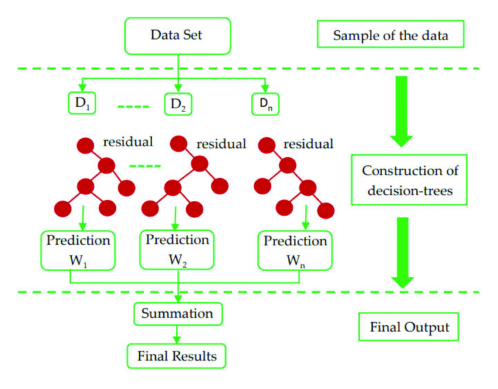

In [19]:
img = mpimg.imread('/Users/laurenmiller/Documents/Drexel MSDS/Spring 23-24/DSCI-631/project/xgboost/XGBoost-extreme-gradient-boosting-algorithm-structure-31.png')
plt.imshow(img)
plt.axis('off')
plt.show()

*********

In [1]:
from dataset import *

In [2]:
train_dataset, val_dataset, test_dataset = image_dataset()

Loaded datasets from cache.


In [3]:
# extract data and labels from subsets of the train_dataset, val_dataset, and test_dataset(<torch.utils.data.dataset.Subset at 0x362007f10>)
import numpy as np 

train_data = []
train_labels = []

for i in range(len(train_dataset)):
    data, label = train_dataset[i]
    train_data.append(data.numpy())
    train_labels.append(label.numpy())

train_data = np.array(train_data)
train_labels = np.array(train_labels)

# reshape data to be 2dim
num_images = train_data.shape[0]
image_size = train_data.shape[1] * train_data.shape[2] * train_data.shape[3]
flattened_train_data = train_data.reshape(num_images, image_size)



In [4]:
# convert data to dmatrices
import xgboost as xgb
dtrain = xgb.DMatrix(data = flattened_train_data, label=train_labels)

In [5]:
val_data = []
val_labels = []

for i in range(len(val_dataset)):
    data, label = val_dataset[i]
    val_data.append(data.numpy())  # Assuming data is in tensor format
    val_labels.append(label.numpy())  # Assuming label is in tensor format

val_data = np.array(val_data)
val_labels = np.array(val_labels)

num_images_val = val_data.shape[0]
image_size_val = val_data.shape[1] * val_data.shape[2] * val_data.shape[3]
flattened_val_data = val_data.reshape(num_images_val, image_size_val)

In [6]:
# convert data to dmatrices
dval = xgb.DMatrix(data=flattened_val_data, label=val_labels)

In [7]:
test_data = []
test_labels = []

for i in range(len(test_dataset)):
    data, label = test_dataset[i]
    test_data.append(data.numpy())  # Assuming data is in tensor format
    test_labels.append(label.numpy())  # Assuming label is in tensor format

test_data = np.array(test_data)
test_labels = np.array(test_labels)

num_images_test = test_data.shape[0]
image_size_test = test_data.shape[1] * test_data.shape[2] * test_data.shape[3]
flattened_test_data = test_data.reshape(num_images_test, image_size_test)

In [43]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.4 MB/s eta 0:00:0000:0100:01


In [8]:
# convert data to dmatrices
dtest = xgb.DMatrix(data=flattened_test_data, label=test_labels)

In [9]:
#define parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

In [10]:
#train the model
num_rounds = 100  
model = xgb.train(params, dtrain, num_rounds, evals=[(dval, 'validation')])

[0]	validation-error:0.19983
[1]	validation-error:0.18814
[2]	validation-error:0.18399
[3]	validation-error:0.17755
[4]	validation-error:0.17598
[5]	validation-error:0.17238
[6]	validation-error:0.17012
[7]	validation-error:0.16706
[8]	validation-error:0.16695
[9]	validation-error:0.16590
[10]	validation-error:0.16360
[11]	validation-error:0.16255
[12]	validation-error:0.16149
[13]	validation-error:0.16058
[14]	validation-error:0.16007
[15]	validation-error:0.15938
[16]	validation-error:0.15811
[17]	validation-error:0.15821
[18]	validation-error:0.15752
[19]	validation-error:0.15858
[20]	validation-error:0.15836
[21]	validation-error:0.15789
[22]	validation-error:0.15730
[23]	validation-error:0.15720
[24]	validation-error:0.15639
[25]	validation-error:0.15625
[26]	validation-error:0.15574
[27]	validation-error:0.15599
[28]	validation-error:0.15563
[29]	validation-error:0.15512
[30]	validation-error:0.15461
[31]	validation-error:0.15406
[32]	validation-error:0.15392
[33]	validation-erro

In [11]:
#evaluate model
predictions = model.predict(dtest)
predictions

array([0.9145047 , 0.5572523 , 0.01318058, ..., 0.47964996, 0.45053235,
       0.09023029], dtype=float32)

In [12]:
binary_predictions = (predictions >= 0.5).astype(int)
binary_predictions

array([1, 1, 0, ..., 0, 0, 0])

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predictions.round())
cm

array([[17875,  1709],
       [ 2430,  5457]])

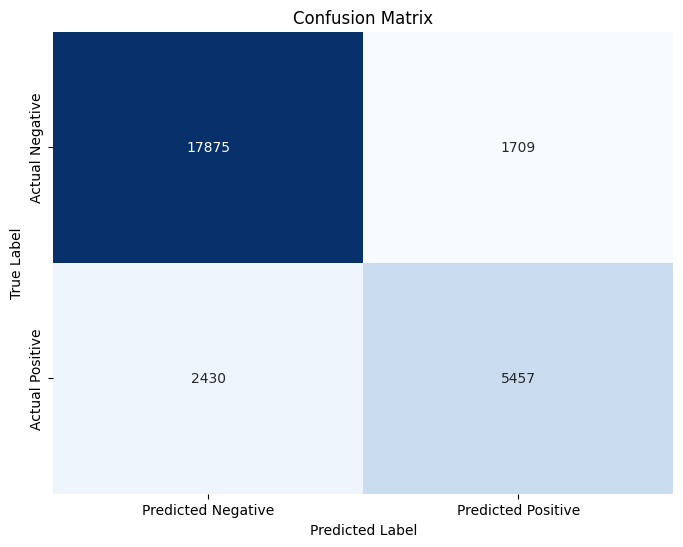

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, predictions.round())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions.round(), target_names=['Negative','Positive'])

print(report)

              precision    recall  f1-score   support

    Negative       0.88      0.91      0.90     19584
    Positive       0.76      0.69      0.73      7887

    accuracy                           0.85     27471
   macro avg       0.82      0.80      0.81     27471
weighted avg       0.85      0.85      0.85     27471



References:

Jiao W, Hao X, Qin C. The Image Classification Method with CNN-XGBoost Model Based on Adaptive Particle Swarm Optimization. Information. 2021; 12(4):156. https://doi.org/10.3390/info12040156

Xin Yu Liew, Nazia Hameed, Jeremie Clos. An investigation of XGBoost-based algorithm for breast cancer classification. Machine Learning with Applications, Volume 6, 2021, 100154, ISSN 2666-8270, https://doi.org/10.1016/j.mlwa.2021.100154.

